In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pylab import *
import os 
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

# Comment tracer n'importe quelles courbes (et plusieurs par graphes) en 5 lignes?
## Instructions:

Après importation des csv dans l'espace de travail

Utilisation de la classe TraceurCourbeAvecSeuil pour tracer des courbes:

1. Initialiser une LISTE de chemin vers un ou plusieurs fichiers CSV

2. Créer un objet traceur = TraceurCourbeAvecSeuil()

3. Set le type de mesure avec traceur.setTypeMesure(typeMesure)

4. Set le lieu s'il est unique avec traceur.set_lieu(lieu)

5. S'il y en a plusieurs, utiliser traceur.set_liste_lieu(liste_lieu)

6. Set les seuils dans une liste de seuil et se"t leur nom dans une liste de nom de seuil

7. Tracer le graph avec traceur.draw_graph()

8. OPTIONNEL:

  8.1. Set l'abscisse avec set_xlabel    Par défaut, xlabel = Temps
  
  8.2. Set l'ordonnée avec set_ylabel    Par défaut, ylabel = ug/m^3



## Classe principale

In [ ]:
class TraceurCourbeAvecSeuil:

  def __init__(self, listeDataframePath, typeMesure="", titre_graph="", lieu=""):
    self.typeMesure = typeMesure
    self.listeDataFramePath = listeDataframePath
    self.liste_deuxieme_dataframe_path = list()
    self.titre_graph = titre_graph
    self.listeDataFrame = list()
    self.liste_deuxieme_dataframe = list()
    self.lieu = lieu
    self.liste_lieu = list()
    self.xlabel = "Temps"
    self.ylabel = "ug/m^3"
    self.liste_seuil = list()
    self.liste_nom_seuil = list()
    self.deuxieme_ylabel = ""
    self.deuxieme_type_mesure = 0

  def add_dataframe(self, dataframe):
    self.listeDataFrame.append(dataframe)

  def set_liste_deuxieme_dataframe_path(self, liste_deuxieme_dataframe_path):
    self.liste_deuxieme_dataframe_path = liste_deuxieme_dataframe_path
    print(self.liste_deuxieme_dataframe_path)

  def add_second_dataframe(self, dataframe):
    self.liste_deuxieme_dataframe.append(dataframe)

  def add_liste_nom_seuil(self, nom_seuil):
    self.liste_nom_seuil.append(nom_seuil)

  def set_liste_nom_seuil(self, liste_nom_seuil):
    self.liste_nom_seuil = liste_nom_seuil

  def set_deuxieme_type_mesure(self, typemesure):
    self.deuxieme_type_mesure = typemesure

  def add_liste_seuil(self, liste_seuil):
    self.liste_seuil.append(liste_seuil)

  def set_liste_seuil(self, liste_seuil):
    self.liste_seuil = liste_seuil

  def setTitreGraph(self, title):
    self.titre_graph = title

  def setTypeMesure(self, typeMesure):
    self.typeMesure = typeMesure

  def set_lieu(self, lieu):
    self.lieu = lieu

  def set_xlabel(self, xlabel):
    self.xlabel= xlabel

  def set_ylabel(self, ylabel):
    self.ylabel= xlabel

  def set_deuxieme_ylabel(self, ylabel):
    self.deuxieme_ylabel = ylabel
  
  def set_liste_lieu(self, liste_lieu):
    self.liste_lieu = liste_lieu

  def _set_seuil_color(self):
    return ['green', 'yellow', 'orange', 'red', 'purple', 'pink', 'brown', 'blue', 'black']

  def csv_reader(self, path):
    dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
    df = pd.read_csv(path, sep=";",parse_dates=['Date'], date_parser=dateparse, header=0, names=['Date', self.typeMesure])
    df.iloc[:, 1:] = df.iloc[:, 1:].replace(',','.', regex=True).astype(float)
    df = df.set_index('Date')
    return df

  def fill_liste_deuxieme_DataFrame(self):
    for path in self.liste_deuxieme_dataframe_path:
      print(path)
      df = self.csv_reader(path)
      self.liste_deuxieme_dataframe.append(df)
 
  def fill_listeDataFrame(self):
    for path in self.listeDataFramePath:
      df = self.csv_reader(path)
      self.listeDataFrame.append(df)    

  def _set_label(self):
    if self.liste_deuxieme_dataframe:
      liste_label = list()
      if len(self.listeDataFrame)==1:
        label = self.typeMesure + " dans " + self.lieu
        liste_label.append(label)
      else:
        if not self.liste_lieu:
          for i in range(len(self.listeDataFrame)):
            liste_label.append('[définir un lieu avec .set_liste_lieu()]')
        for lieu in self.liste_lieu:
          liste_label.append(self.typeMesure + " dans " + lieu)
        if not self.liste_lieu:
          for i in range(len(self.liste_deuxieme_dataframe)):
            liste_label.append('[définir un lieu avec .set_liste_lieu()]')
        for lieu in self.liste_lieu:
          liste_label.append(self.deuxieme_type_mesure + " dans " + lieu)
      return liste_label

    else:
      if len(self.listeDataFrame)==1:
        label = self.typeMesure + " dans " + self.lieu
        return [label]
      else:
        liste_label = list()
        if not self.liste_lieu:
          for i in range(len(self.listeDataFrame)):
            liste_label.append('[définir un lieu avec .set_liste_lieu()]')
        for lieu in self.liste_lieu:
          liste_label.append(self.typeMesure + " dans " + lieu)
        return liste_label


  def draw_graph(self):

    self.fill_listeDataFrame()

    if self.liste_deuxieme_dataframe_path:
      self.fill_liste_deuxieme_DataFrame()

    sns.set(rc={'figure.figsize':(20,10)}) # largeur hauteur

    # plt.figure()

    fig,ax=plt.subplots()
    ax.set_title(self.titre_graph)
    liste_label = self._set_label()

    for i in range(len(self.listeDataFrame)):
      ax.plot(self.listeDataFrame[i], label=liste_label[i])

    for i in range(len(self.liste_seuil)):
      ax.axhline(self.liste_seuil[i], label=self.liste_nom_seuil[i], color=self._set_seuil_color()[i])

    if self.liste_deuxieme_dataframe:
      ax2 = ax.twinx()
      for i in range(len(self.liste_deuxieme_dataframe)):
        ax2.plot(self.liste_deuxieme_dataframe[i], label = self.deuxieme_ylabel)
        

    ax.set_xlabel(self.xlabel)
    ax.set_ylabel(self.ylabel)
    ax.legend()

    plt.show()



  

  

# PM

## PM10

In [ ]:
path1 = "mazametSalePM10.csv"
path2 = "mazametProprePM10.csv"
path3 = "mazametRemisePM10.csv"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


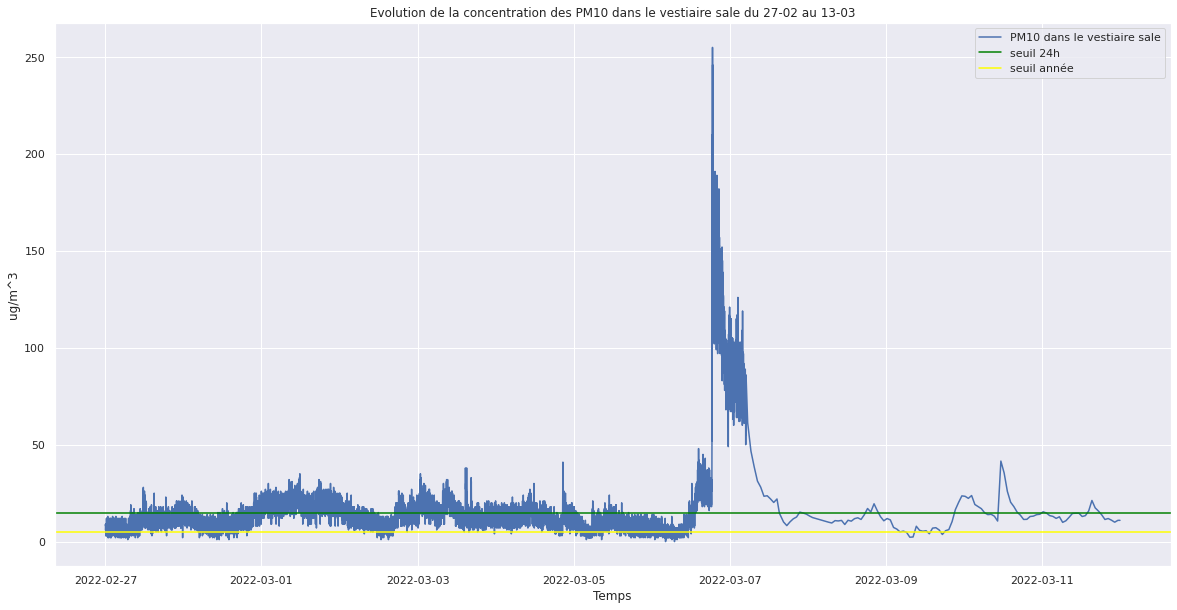

In [ ]:
pm_handler = TraceurCourbeAvecSeuil([path1], "PM10")
pm_handler.setTitreGraph("Evolution de la concentration des PM10 dans le vestiaire sale du 27-02 au 13-03")
pm_handler.set_lieu("le vestiaire sale")
pm_handler.set_liste_seuil([15,5])
pm_handler.set_liste_nom_seuil(["seuil 24h", "seuil année"])
pm_handler.draw_graph()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


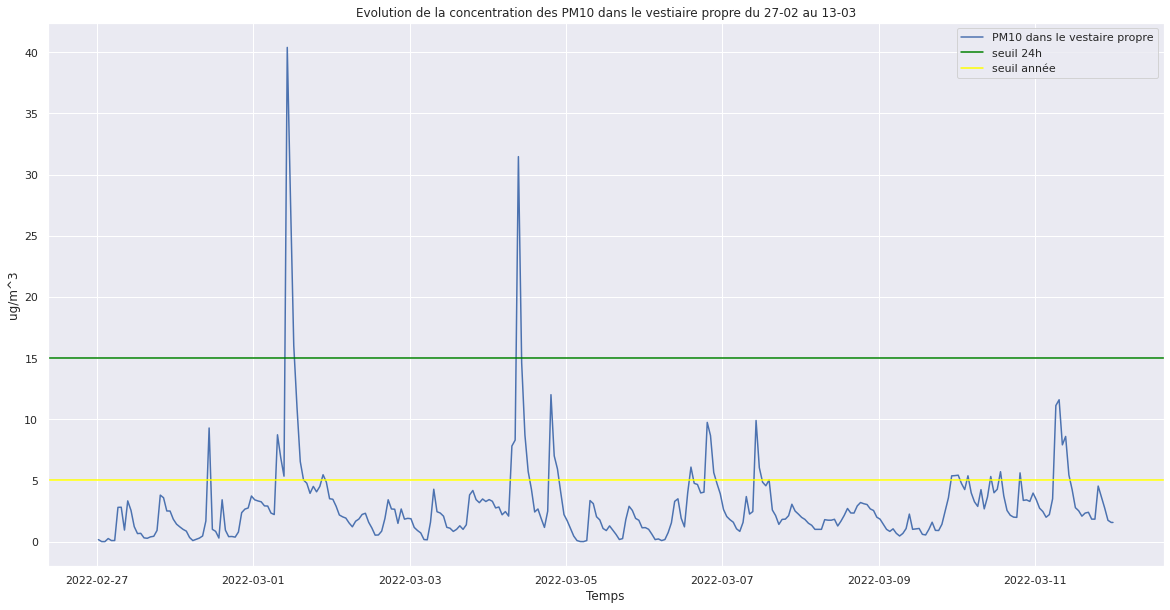

In [ ]:
pm_handler2 = TraceurCourbeAvecSeuil([path2], "PM10")
pm_handler2.setTitreGraph("Evolution de la concentration des PM10 dans le vestiaire propre du 27-02 au 13-03")
pm_handler2.set_lieu("le vestaire propre")
pm_handler2.set_liste_seuil([15,5])
pm_handler2.set_liste_nom_seuil(["seuil 24h", "seuil année"])
pm_handler2.draw_graph()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


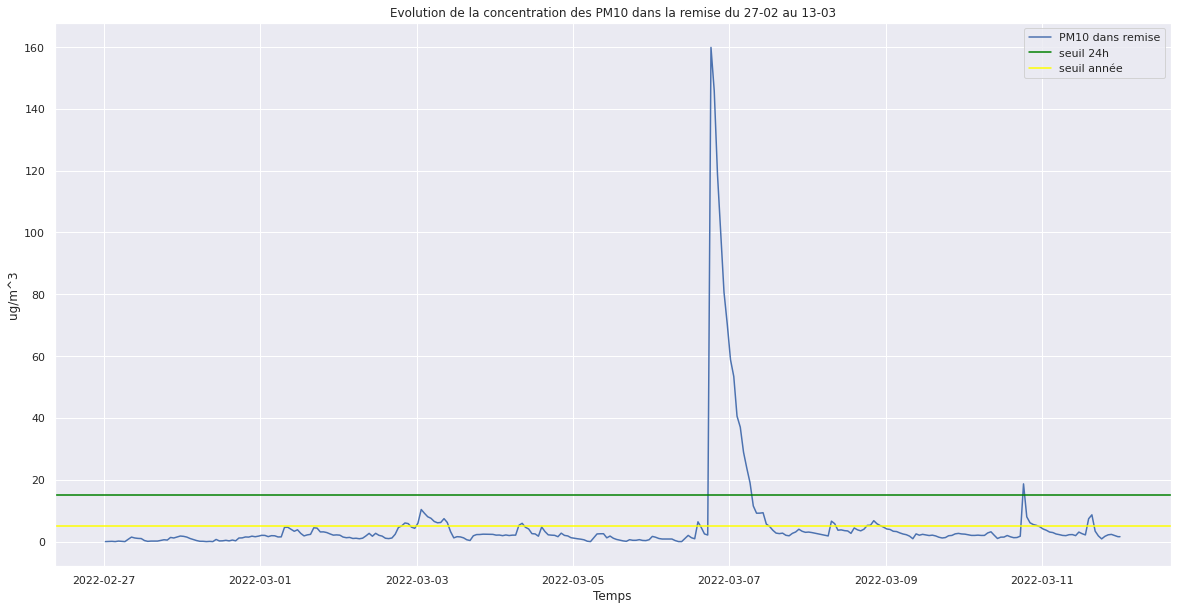

In [ ]:
pm_handler3 = TraceurCourbeAvecSeuil([path3], "PM10")
pm_handler3.setTitreGraph("Evolution de la concentration des PM10 dans la remise du 27-02 au 13-03")
pm_handler3.set_lieu("remise")
pm_handler3.set_liste_seuil([15,5])
pm_handler3.set_liste_nom_seuil(["seuil 24h", "seuil année"])
pm_handler3.draw_graph()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


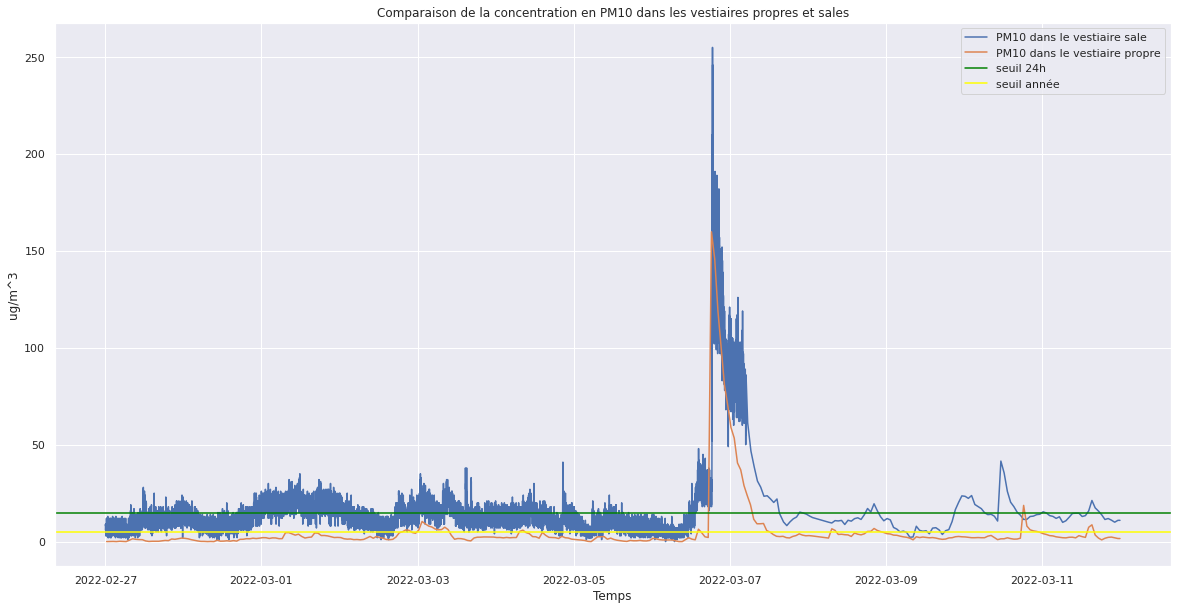

In [ ]:
pm_handler4 = TraceurCourbeAvecSeuil([path1, path3], "PM10")
pm_handler4.setTitreGraph("Comparaison de la concentration en PM10 dans les vestiaires propres et sales")
pm_handler4.set_liste_lieu(["le vestiaire sale", "le vestiaire propre"])
pm_handler4.set_liste_seuil([15,5])
pm_handler4.set_liste_nom_seuil(["seuil 24h", "seuil année"])
pm_handler4.draw_graph()

## PM2.5

In [ ]:
pmPropre = "mazametProprePM2_5.csv"
pmSale = "mazametSalePM2_5.csv"
pmRemise = "mazametRemisePM2_5.csv"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


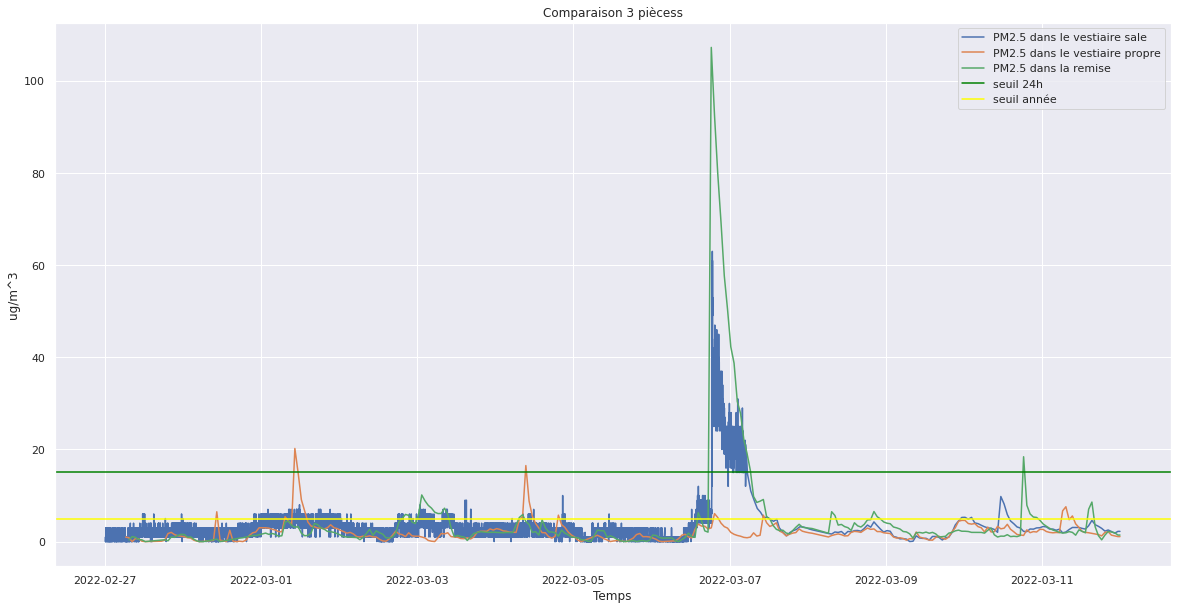

In [ ]:
pm_handler4 = TraceurCourbeAvecSeuil([pmSale, pmPropre, pmRemise], "PM2.5")
pm_handler4.setTitreGraph("Comparaison 3 piècess")
pm_handler4.set_liste_lieu(["le vestiaire sale", "le vestiaire propre", 'la remise'])
pm_handler4.set_liste_seuil([15,5])
pm_handler4.set_liste_nom_seuil(["seuil 24h", "seuil année"])
pm_handler4.draw_graph()

# COV

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


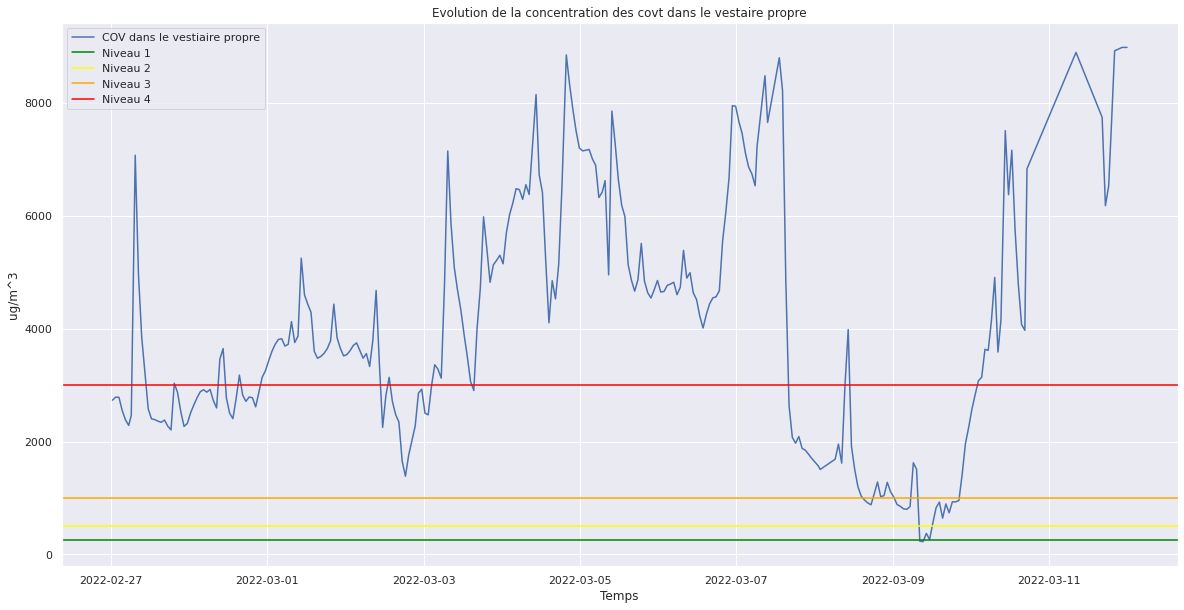

In [ ]:
covPropre = "mazametPropreCOV.csv"

cov_handler = TraceurCourbeAvecSeuil([covPropre], "COV")
cov_handler.setTitreGraph("Evolution de la concentration des covt dans le vestaire propre")
cov_handler.set_lieu("le vestiaire propre")
cov_handler.set_liste_seuil([250,500,1000,3000])
cov_handler.set_liste_nom_seuil(["Niveau 1", "Niveau 2", "Niveau 3", "Niveau 4", "Niveau 5"])
cov_handler.draw_graph()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


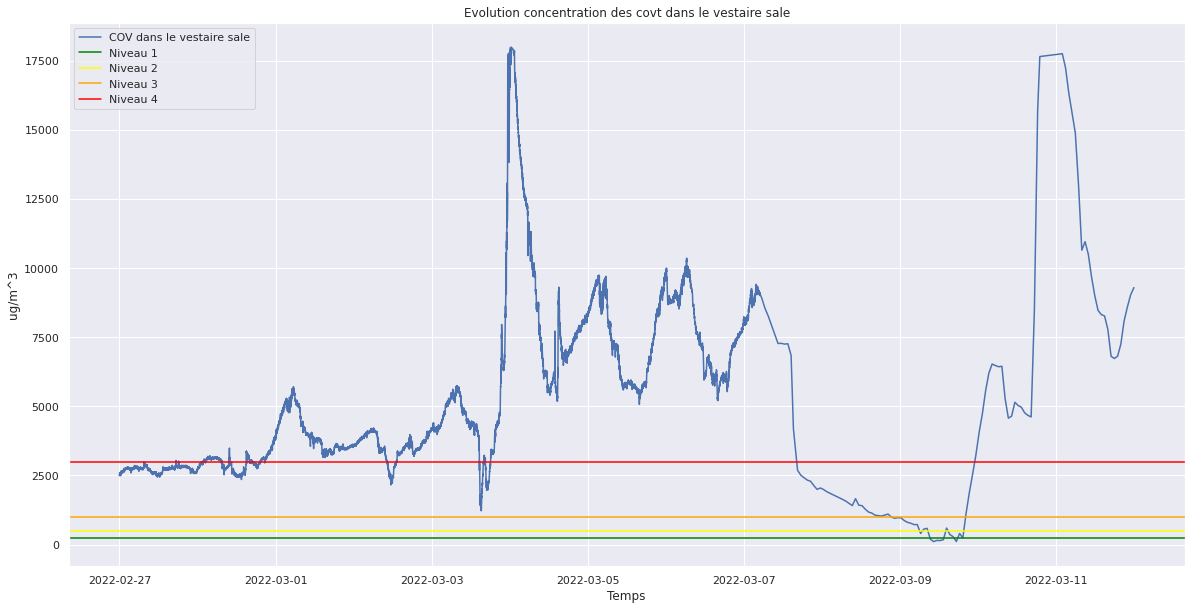

In [ ]:
covSale = "mazametSaleCOV.csv"

cov_handler = TraceurCourbeAvecSeuil([covSale], "COV")
cov_handler.setTitreGraph("Evolution concentration des covt dans le vestaire sale")
cov_handler.set_lieu("le vestaire sale")
cov_handler.set_liste_seuil([250,500,1000,3000])
cov_handler.set_liste_nom_seuil(["Niveau 1", "Niveau 2", "Niveau 3", "Niveau 4", "Niveau 5"])
cov_handler.draw_graph()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


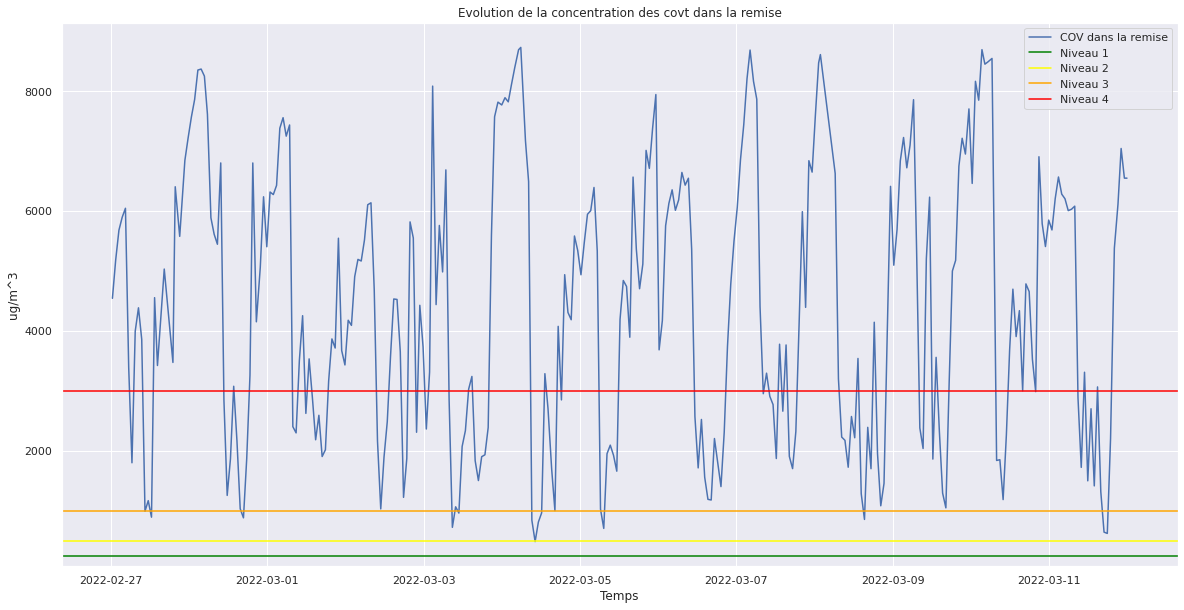

In [ ]:
covRemise = "mazametRemiseCOV.csv"

cov_handler = TraceurCourbeAvecSeuil([covRemise], "COV")
cov_handler.setTitreGraph("Evolution de la concentration des covt dans la remise")
cov_handler.set_lieu("la remise")
cov_handler.set_liste_seuil([250,500,1000,3000])
cov_handler.set_liste_nom_seuil(["Niveau 1", "Niveau 2", "Niveau 3", "Niveau 4", "Niveau 5"])
cov_handler.draw_graph()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


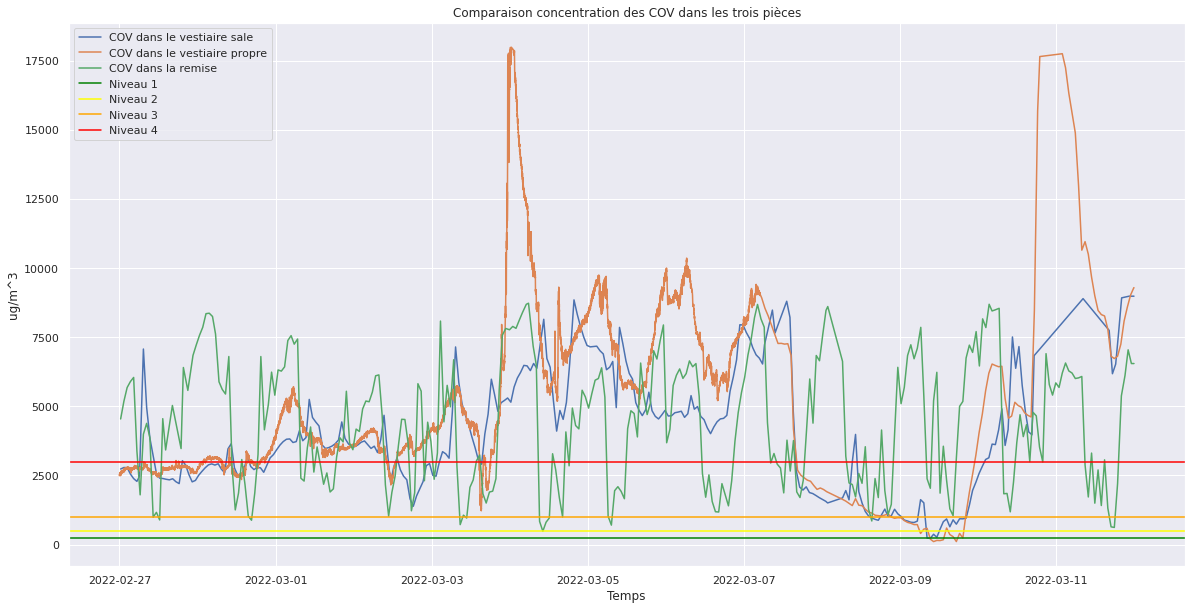

In [ ]:

cov_handler = TraceurCourbeAvecSeuil([covPropre, covSale, covRemise], "COV")
cov_handler.setTitreGraph("Comparaison concentration des COV dans les trois pièces")
cov_handler.set_liste_lieu(["le vestiaire sale", "le vestiaire propre", "la remise"])
cov_handler.set_liste_seuil([250,500,1000,3000])
cov_handler.set_liste_nom_seuil(["Niveau 1", "Niveau 2", "Niveau 3", "Niveau 4", "Niveau 5"])
cov_handler.draw_graph()

## COV + PM

['mazametProprePM2_5.csv', 'mazametProprePM10.csv']
mazametProprePM2_5.csv
mazametProprePM10.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


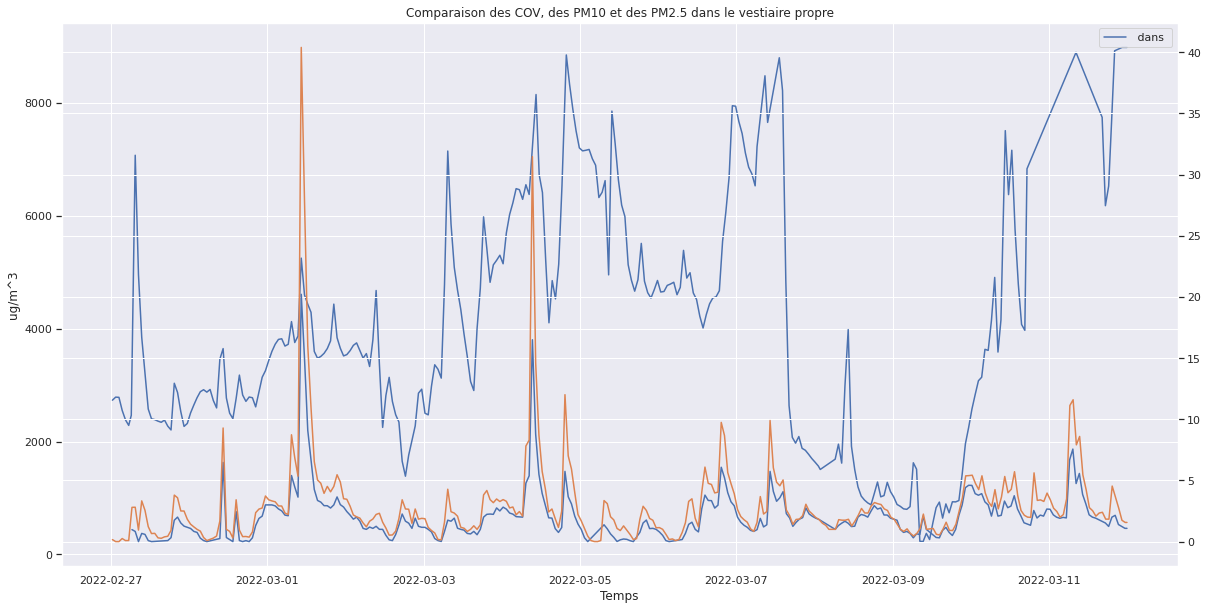

In [ ]:
cov_handler = TraceurCourbeAvecSeuil([covPropre])
cov_handler.set_liste_deuxieme_dataframe_path([pmPropre, path2])
cov_handler.set_deuxieme_type_mesure('PM')
cov_handler.setTitreGraph("Comparaison des COV, des PM10 et des PM2.5 dans le vestiaire propre")
cov_handler.set_liste_lieu(["vestiaire propre", "vestiaire propre", "vestiaire propre"])
cov_handler.draw_graph()

Tableau de corrélation entre composées

construire des signaux carrés dates de retour + t avec t variant de 1 à 10

analyse stastistique, histogramme, boxplot, 
